In [1]:
import sys
sys.path.append("../")

import yaml
import matplotlib.pyplot as plt
import cattrs
from typing import List
#from mixture_optimization.datamodels.trial_tracking_config import Experiment, ValResult, Dict
from mixture_optimization.datamodels.trial_tracking_config import Experiment, ValResult, Dict, TrialType
import numpy as np

In [2]:
def read_experiments(experimnt_history):
    with open(experimnt_history, 'r') as f:
        obj = yaml.safe_load(f)
    
    experiments = cattrs.structure(obj, List[Experiment])
    return experiments


def get_experiment_result(experiment: Experiment):
    val_results: List[Dict[str, ValResult]] = []
    domain_weights: List[Dict[str, float]] = []
    weighted_perplexity = []
    for i, trial in enumerate(experiment.trials):
        if not trial.weighted_val_perplexity:
            print(f"Trial {i} did not finish yet. Breaking")
            break
        val_results.append(trial.val_results)
        weighted_perplexity.append(trial.weighted_val_perplexity)
        domain_weights.append(trial.true_mixing_weights)
    return val_results, weighted_perplexity, domain_weights

def plot_weighted_val_perplexity(weighted_val_perplexities: List[float], no_initial_runs: int = 0):
    plt.plot(weighted_val_perplexities)
    plt.scatter(range(len(weighted_val_perplexities)), weighted_val_perplexities)
    plt.axvline(x=no_initial_runs - 1, color='r', linestyle='--')
    plt.xlabel('Trial Iteration')
    plt.ylabel('Average Log Perplexity')
    plt.annotate('Initialization Runs End', 
                 xy=(no_initial_runs - 1, max(weighted_val_perplexities)), 
                 xytext=(no_initial_runs - 1, max(weighted_val_perplexities) + 0.05),  # Adjust the vertical position above the plot
                 textcoords='data', 
                 ha='center',  # Center the text horizontally
                 color='r')
    
    if no_initial_runs:
        init_trials = weighted_val_perplexities[:no_initial_runs]
        best_init_trial = min(init_trials)
        plt.axhline(y=best_init_trial, color='g', linestyle='--')
        plt.text(0, best_init_trial-0.01, "Best Init Trial", 
                 verticalalignment='top',  # Align text above this position
                 color='g')
    #plt.title('Average Val Perplexity over Trials')

def plot_domain_perplexities(val_results: List[Dict[str, ValResult]], no_initial_runs: int = 0):
    max_plots_per_row = 4
    domains = val_results[0].keys()
    num_plots = len(domains)
    num_rows = num_plots // max_plots_per_row + 1
    num_cols = min(num_plots, max_plots_per_row)
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(5*num_cols, 5*num_rows))
    fig.suptitle('Domain Perplexities')
    axs = axs.flatten()

    for i, domain in enumerate(domains):
        domain_perplexities = [val_result[domain].perplexity for val_result in val_results]
        axs[i].plot(domain_perplexities)
        axs[i].set_title(domain)
        axs[i].set_xlabel('Run')
        axs[i].set_ylabel('Perplexity')
        axs[i].axvline(x=no_initial_runs - 1, color='r', linestyle='--')
        axs[i].scatter(range(len(domain_perplexities)), domain_perplexities)
    plt.tight_layout()  

def plot_mixing_weights(mixing_weights: List[Dict[str, float]], no_initial_runs: int = 0):
    max_plots_per_row = 4
    domains = mixing_weights[0].keys()
    num_plots = len(domains)
    num_rows = num_plots // max_plots_per_row + 1
    num_cols = min(num_plots, max_plots_per_row)
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(5*num_cols, 5*num_rows))
    fig.suptitle('Mixing Weights')
    axs = axs.flatten()

    for i, domain in enumerate(domains):
        mix_w = [weight[domain] for weight in mixing_weights]
        axs[i].plot(mix_w)
        axs[i].set_title(domain)
        axs[i].set_xlabel('Run')
        axs[i].set_ylabel('Mixing Weight')
        axs[i].legend()
        axs[i].axvline(x=no_initial_runs - 1, color='r', linestyle='--')
        axs[i].scatter(range(len(mix_w)), mix_w)
    plt.tight_layout()  

In [3]:
path = "../logs/uniform_books_cc_stack_pes20_small_0/experiment_history.yaml"

experiments = read_experiments(path)
experiment_0 = experiments[0]
experiment_1 = experiments[1]

experiment_0.trials = [trial for trial in experiment_0.trials if trial.experiment_idx == 0]
experiment_1.trials = [trial for trial in experiment_1.trials if trial.experiment_idx == 1]


In [7]:
def plot_val_results(res):
    out_dict = {}
    for domain, val_res in res.items():
        out_dict[domain] = val_res.loss

    return out_dict

/tmp/ipykernel_701669/2985232126.py:80: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[i].legend()


Best trial achieved a weighted val perplexity of 4.41090335547924. The mixing weights were {'Books': 0.15982877141037713, 'CC': 0.24192705640311107, 'Pes2O': 0.04918331691440203, 'Reddit': 0.23702314797176308, 'stack-v4': 0.3120377073003467}. The domain perplexities were {'Books': 4.483496695756912, 'CC': 4.782995909452438, 'Pes2O': 5.134135961532593, 'Reddit': 4.684157907962799, 'stack-v4': 2.9697303026914597}. Trial idx: 8
Best init trial achieved a weighted val perplexity of 4.41090335547924. The mixing weights were {'Books': 0.15982877141037713, 'CC': 0.24192705640311107, 'Pes2O': 0.04918331691440203, 'Reddit': 0.23702314797176308, 'stack-v4': 0.3120377073003467}. The domain perplexities were {'Books': 4.483496695756912, 'CC': 4.782995909452438, 'Pes2O': 5.134135961532593, 'Reddit': 4.684157907962799, 'stack-v4': 2.9697303026914597}. Trial idx: 8
Percentual improvement: 0.00%
BEst inint exp perplexity: 82.34, best exp perplexity: 82.34. Percentual improvement: 0.00%


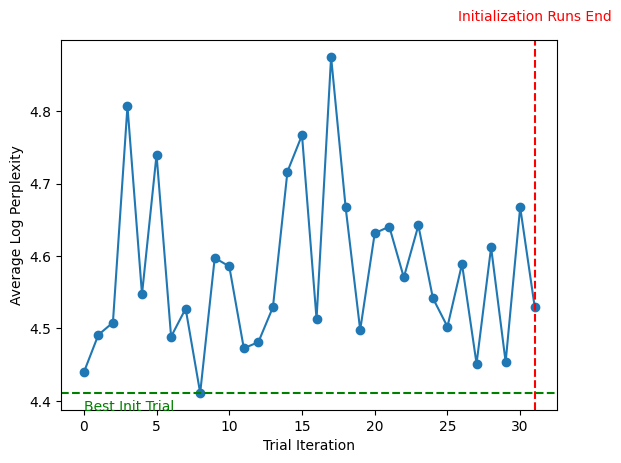

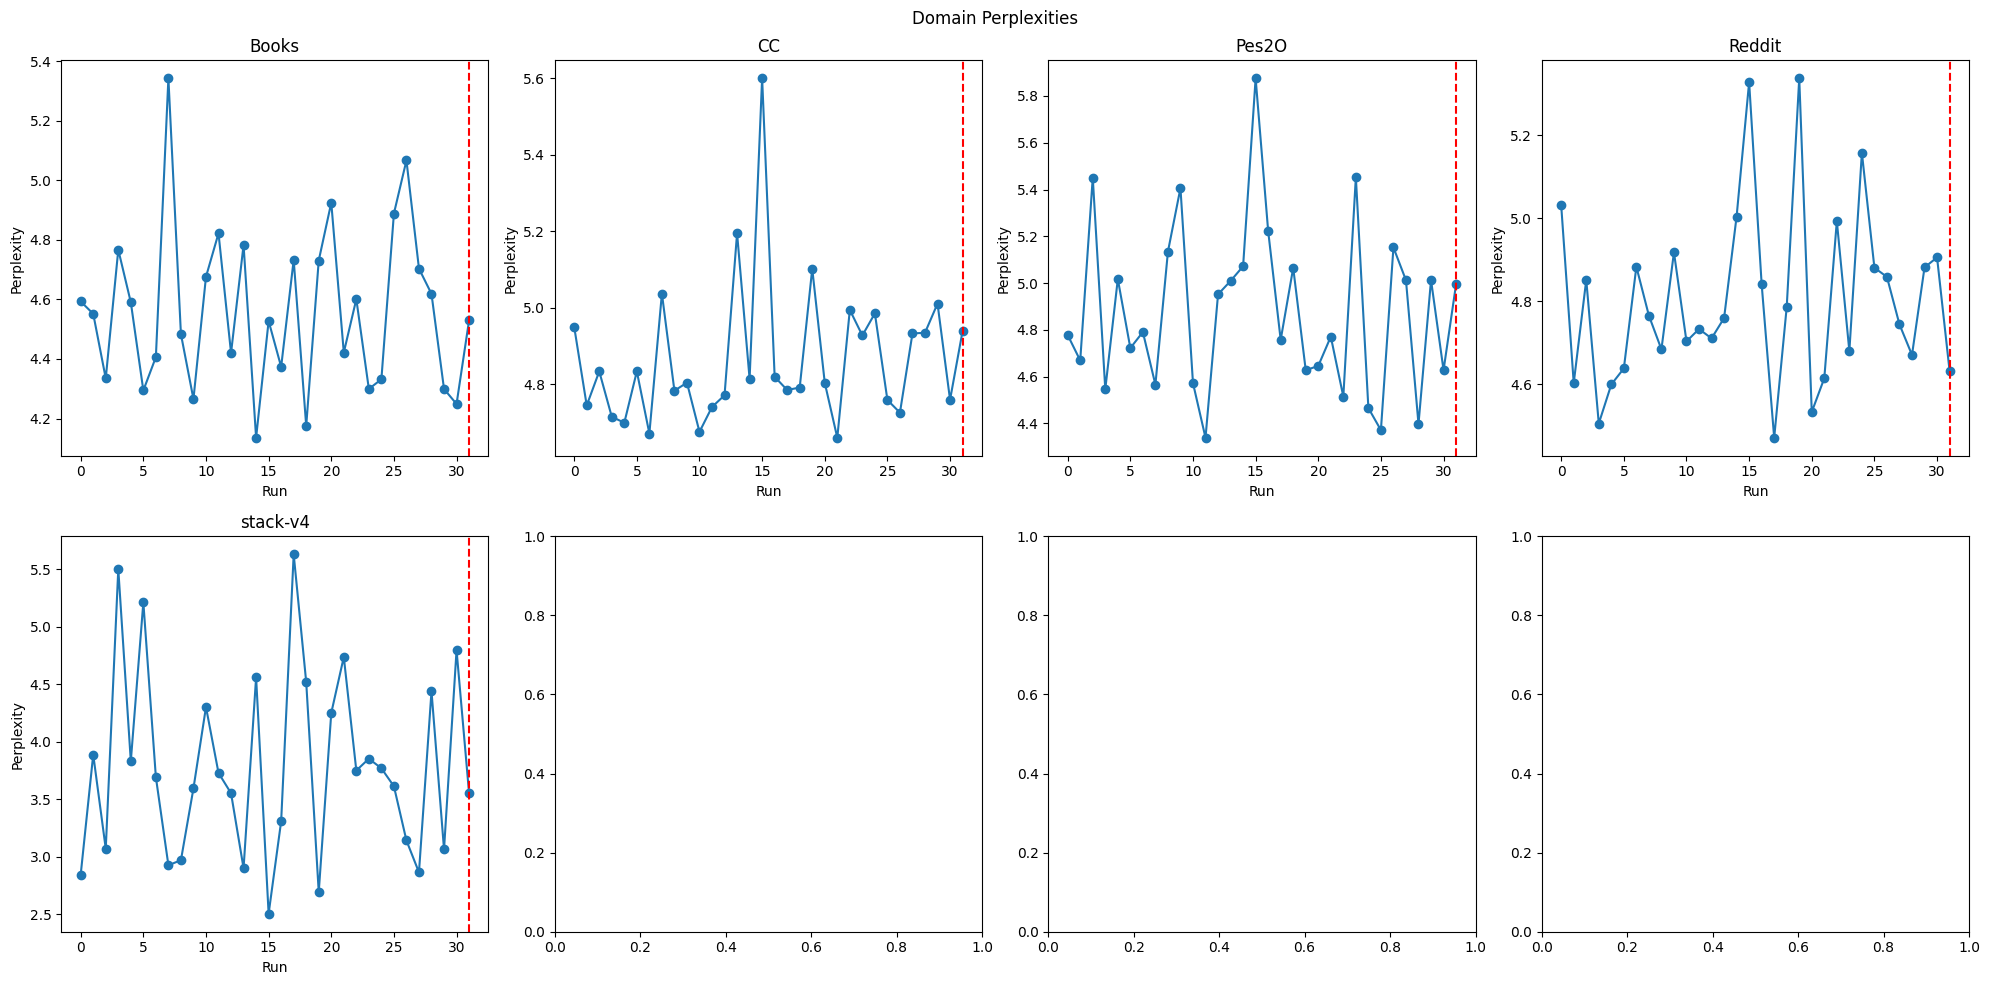

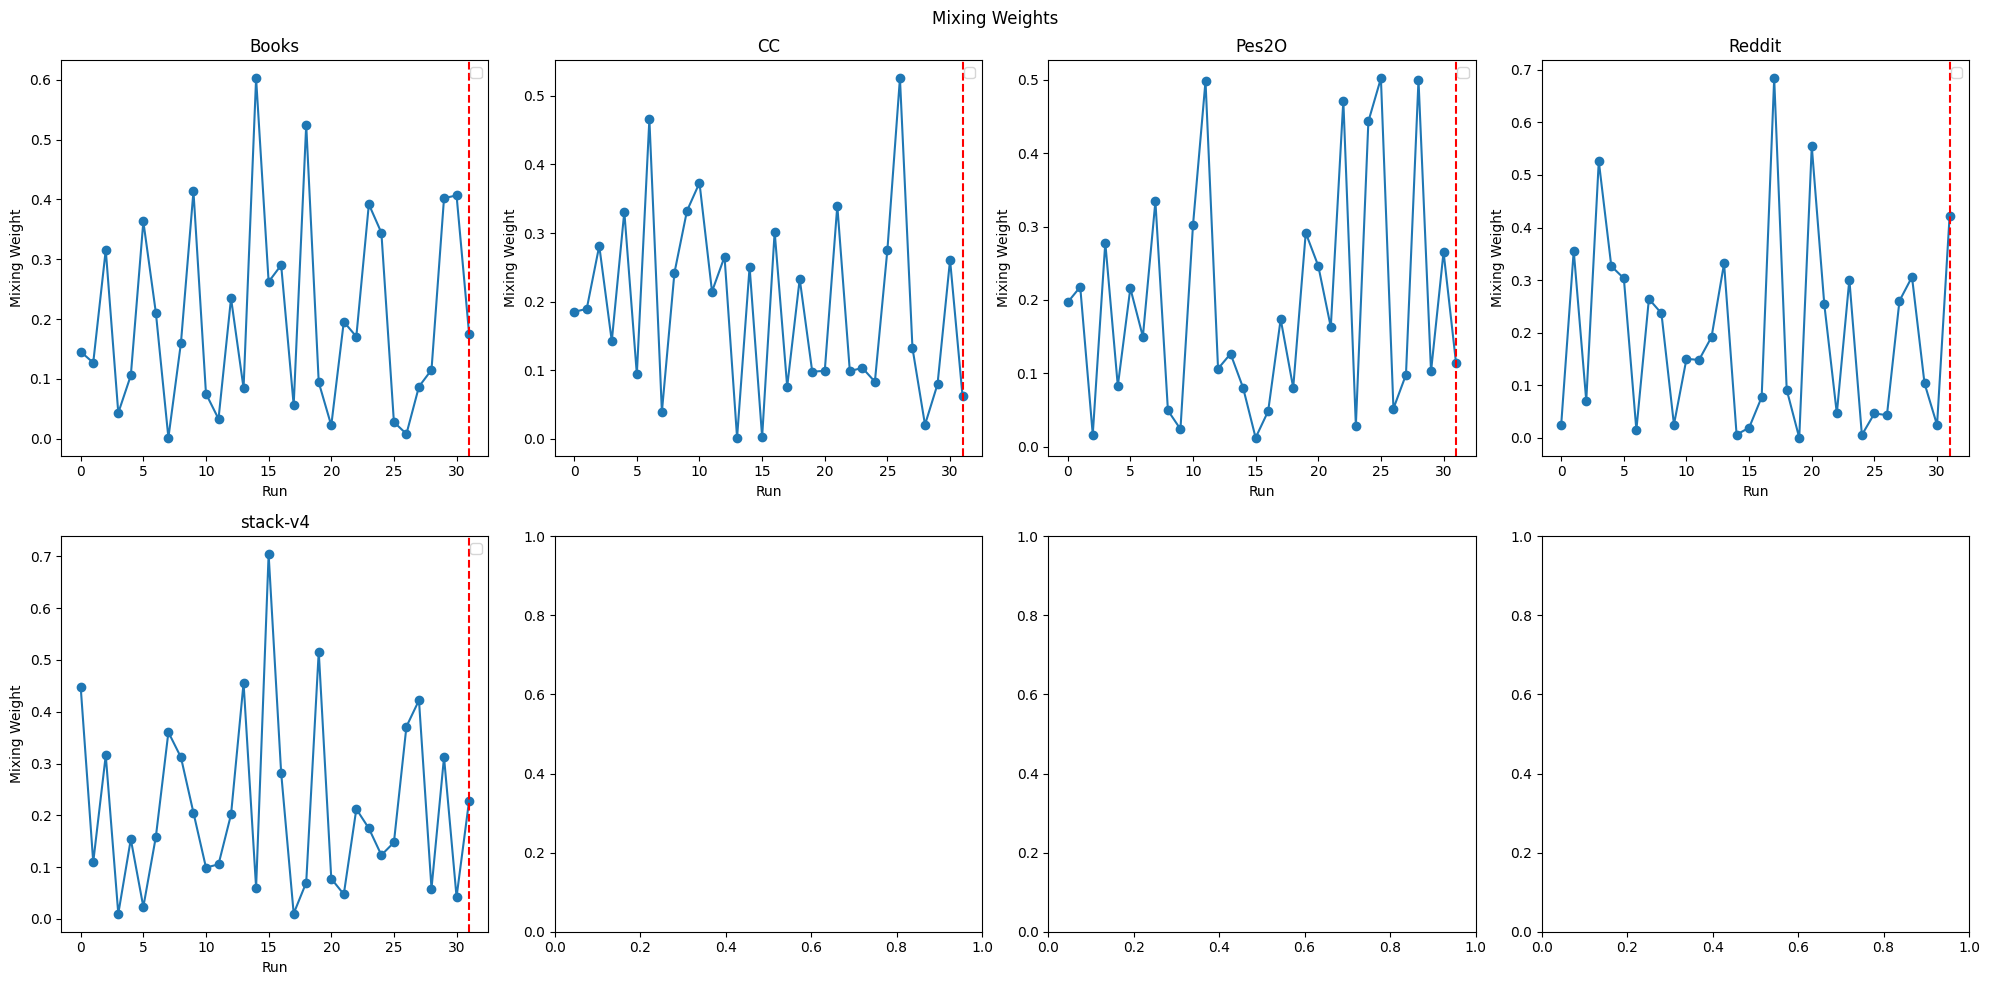

In [13]:
path = "/root/code/mixture_optimization/logs/bayesian-two-sources_0/experiment_history.yaml"
path = "/root/code/mixture_optimization/logs/bayesian_books_cc_stack_few_init_0/experiment_history.yaml"
#path = "/root/code/mixture_optimization/logs/turbo_books_cc_stack_0/experiment_history.yaml"
#path="/root/code/mixture_optimization/logs/bayesian_books_cc_stack_0/experiment_history.yaml"
path = "/root/code/mixture_optimization/logs/bayesian_books_cc_stack_pes2o_0/experiment_history.yaml"
#path="/root/code/mixture_optimization/logs/bayesian_books_cc_stack_pes2o_16init_0/experiment_history.yaml"
#path = "/root/code/mixture_optimization/logs/turbo-new_15/experiment_history.yaml"

#path = "/root/code/mixture_optimization/logs/lin_interp_books_c4_80M_0/experiment_history.yaml"
#path = "/root/code/mixture_optimization/logs/lin_interp_books_c4_0/experiment_history.yaml"
#path = "../logs/uniform_books_cc_stack_peso_reddit/experiment_history.yaml"
path = "../logs/bayesian_books_cc_stack_pes2o_reddit_16init_0/experiment_history.yaml"
#path = "../logs/bayesian_books_cc_stack_pes2o_reddit_16init_1/experiment_history.yaml"
#path = "../logs/bayesian_books_cc_stack_pes2o_reddit_32init_0/experiment_history.yaml"
#path = "../logs/bayesian_books_cc_stack_pes20_small_0/experiment_history_proper.yaml"
#path = "../logs/uniform_books_cc_stack_pes20_small_0/experiment_history.yaml"
#path = "../logs/bayesian_books_cc_stack_pes20_small_1/experiment_history.yaml"
#path = "../logs/uniform_books_cc_stack_pes20_small_0/experiment_history.yaml"
path = "../logs/uniform_books_cc_stack_peso_reddit/experiment_history.yaml"
#path = "../logs/uniform_books_cc_stack_pes20_small_0/experiment_history_filtered.yaml"
#path = "../logs/bayesian_books_cc_stack_pes20_small_1/experiment_history_filtered.yaml"

#path = "../logs/bayesian_books_cc_stack_pes2o_reddit_c4_wiki_32_init_0/experiment_history.yaml"

experiments = read_experiments(path)
experiment = experiments[0]

# max_trials = 32
# experiment.trials = experiment.trials[:max_trials]

no_initi_trials = sum([1 for trial in experiment.trials if trial.type == TrialType.INITIALIZATION])


best_trial = None
best_init_trial = None
for trial in experiment.trials:
    if trial.val_results is None:
        continue

    if best_trial is None or trial.weighted_val_perplexity < best_trial.weighted_val_perplexity:
        best_trial = trial
    
    if trial.type == TrialType.INITIALIZATION:
        if best_init_trial is None or trial.weighted_val_perplexity < best_init_trial.weighted_val_perplexity:
            best_init_trial = trial

val_results, weighted_perplexity, domain_weights = get_experiment_result(experiment)
plot_weighted_val_perplexity(weighted_perplexity, no_initial_runs=no_initi_trials)
# add hline for best init trial
#plt.axhline(y=best_init_trial.weighted_val_perplexity, color='g', linestyle='--')

plot_domain_perplexities(val_results, no_initial_runs=no_initi_trials)
plot_mixing_weights(domain_weights, no_initial_runs=no_initi_trials)




    
print(f"Best trial achieved a weighted val perplexity of {best_trial.weighted_val_perplexity}. The mixing weights were {best_trial.true_mixing_weights}. The domain perplexities were {plot_val_results(best_trial.val_results)}. Trial idx: {best_trial.idx}")
print(f"Best init trial achieved a weighted val perplexity of {best_init_trial.weighted_val_perplexity}. The mixing weights were {best_init_trial.true_mixing_weights}. The domain perplexities were {plot_val_results(best_init_trial.val_results)}. Trial idx: {best_init_trial.idx}")
percentual_improvement = (best_init_trial.weighted_val_perplexity - best_trial.weighted_val_perplexity) / best_init_trial.weighted_val_perplexity * 100
print(f"Percentual improvement: {percentual_improvement:.2f}%")

exp_perplexity_init = np.exp(best_init_trial.weighted_val_perplexity)
exp_perplexity = np.exp(best_trial.weighted_val_perplexity)
percentual_improvement_exp_perplexity = (exp_perplexity_init - exp_perplexity) / exp_perplexity_init * 100
print(f"BEst inint exp perplexity: {exp_perplexity_init:.2f}, best exp perplexity: {exp_perplexity:.2f}. Percentual improvement: {percentual_improvement_exp_perplexity:.2f}%")

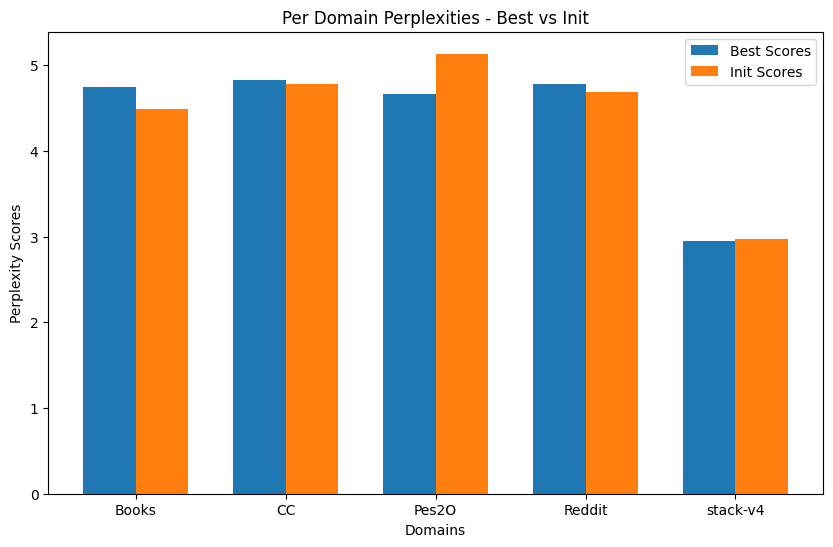

In [11]:
per_domain_perplexities_best = plot_val_results(best_trial.val_results)
per_domain_perplexities_init = plot_val_results(best_init_trial.val_results)

# Extract keys and values
domains = list(per_domain_perplexities_best.keys())
best_scores = list(per_domain_perplexities_best.values())
init_scores = list(per_domain_perplexities_init.values())

# Define the positions of the bars
x = range(len(domains))
width = 0.35  # width of the bars

# Plotting the grouped bar chart
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar([i - width/2 for i in x], best_scores, width, label='Best Scores')
ax.bar([i + width/2 for i in x], init_scores, width, label='Init Scores')

# Adding labels and title
ax.set_xlabel('Domains')
ax.set_ylabel('Perplexity Scores')
ax.set_title('Per Domain Perplexities - Best vs Init')
ax.set_xticks(x)
ax.set_xticklabels(domains)
ax.legend()

In [12]:
from mixture_optimization.weight_selector.utils.cross_validation import cross_validate_run, cross_validate_leave_one_out, cross_validate_over_time
from mixture_optimization.datamodels.weight_selector_config import WeightSelectorConfig, WeightSelectorType


In [37]:
# res = cross_validate_run(experiment, train_idxs, val_idx_random)
true_perplexities, pred_perplexities, (lower, upper) = cross_validate_leave_one_out(experiment)

Iteration 0/64
Iteration 1/64
Iteration 2/64
Iteration 3/64


Iteration 4/64
Iteration 5/64
Iteration 6/64
Iteration 7/64
Iteration 8/64
Iteration 9/64
Iteration 10/64
Iteration 11/64
Iteration 12/64
Iteration 13/64
Iteration 14/64
Iteration 15/64
Iteration 16/64
Iteration 17/64
Iteration 18/64
Iteration 19/64
Iteration 20/64
Iteration 21/64
Iteration 22/64
Iteration 23/64
Iteration 24/64
Iteration 25/64
Iteration 26/64
Iteration 27/64
Iteration 28/64
Iteration 29/64
Iteration 30/64
Iteration 31/64
Iteration 32/64
Iteration 33/64
Iteration 34/64
Iteration 35/64
Iteration 36/64
Iteration 37/64
Iteration 38/64
Iteration 39/64
Iteration 40/64
Iteration 41/64
Iteration 42/64
Iteration 43/64
Iteration 44/64
Iteration 45/64
Iteration 46/64
Iteration 47/64
Iteration 48/64
Iteration 49/64
Iteration 50/64
Iteration 51/64
Iteration 52/64
Iteration 53/64
Iteration 54/64
Iteration 55/64
Iteration 56/64
Iteration 57/64
Iteration 58/64
Iteration 59/64
Iteration 60/64
Iteration 61/64
Iteration 62/64
Iteration 63/64


Text(0, 0.5, 'Predicted perplexity')

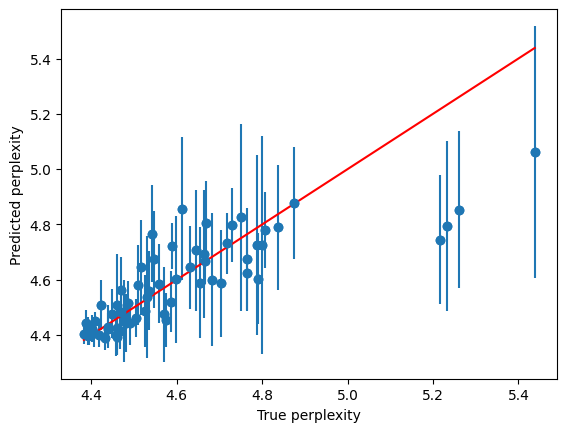

In [38]:
true_perplexities = np.array(true_perplexities)
pred_perplexities = np.array(pred_perplexities)
lower = np.array(lower)
upper = np.array(upper)

plt.figure()
plt.scatter(true_perplexities, pred_perplexities)
plt.errorbar(true_perplexities, pred_perplexities, yerr=[pred_perplexities - lower, upper - pred_perplexities], fmt='o')
origin_min = min(min(true_perplexities), min(pred_perplexities))
origin_max = max(max(true_perplexities), max(pred_perplexities))

origin_line = np.linspace(origin_min, origin_max, 100)

plt.plot(origin_line, origin_line, color='r')

plt.xlabel('True perplexity')
plt.ylabel('Predicted perplexity')


In [39]:
true_perplexities, pred_perplexities, (lower, upper) = cross_validate_over_time(experiment)

Iteration 16/64
Iteration 17/64
Iteration 18/64
Iteration 19/64
Iteration 20/64
Iteration 21/64
Iteration 22/64
Iteration 23/64
Iteration 24/64
Iteration 25/64
Iteration 26/64
Iteration 27/64
Iteration 28/64
Iteration 29/64
Iteration 30/64
Iteration 31/64
Iteration 32/64
Iteration 33/64
Iteration 34/64
Iteration 35/64
Iteration 36/64
Iteration 37/64
Iteration 38/64
Iteration 39/64
Iteration 40/64
Iteration 41/64
Iteration 42/64
Iteration 43/64
Iteration 44/64
Iteration 45/64
Iteration 46/64
Iteration 47/64
Iteration 48/64
Iteration 49/64
Iteration 50/64
Iteration 51/64
Iteration 52/64
Iteration 53/64
Iteration 54/64
Iteration 55/64
Iteration 56/64
Iteration 57/64
Iteration 58/64
Iteration 59/64
Iteration 60/64
Iteration 61/64
Iteration 62/64
Iteration 63/64


Text(0.5, 1.0, 'Cross Validation')

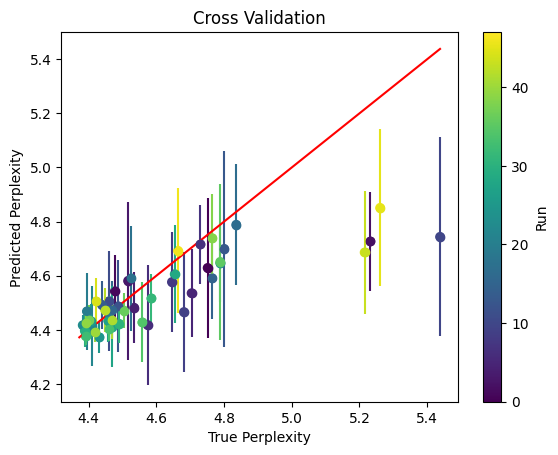

In [40]:
true_perplexities = np.array(true_perplexities)
pred_perplexities = np.array(pred_perplexities)

# max_trials = 10
# true_perplexities = true_perplexities[:max_trials]
# pred_perplexities = pred_perplexities[:max_trials]


lower = np.array(lower)
upper = np.array(upper)
origin_min = min(min(true_perplexities), min(pred_perplexities))
origin_max = max(max(true_perplexities), max(pred_perplexities))

cmap = plt.get_cmap('viridis')
norm = plt.Normalize(0, len(true_perplexities))
colors = cmap(norm(range(len(true_perplexities))))

plt.figure()
for i in range(len(true_perplexities)):
    plt.errorbar(true_perplexities[i], pred_perplexities[i],
                 yerr=[[pred_perplexities[i] - lower[i]], [upper[i] - pred_perplexities[i]]],
                 fmt='o', color=colors[i], zorder=2)
plt.scatter(true_perplexities, pred_perplexities, c=range(len(true_perplexities)), cmap='viridis')
plt.colorbar(label='Run')

origin_line = np.linspace(origin_min, origin_max, 100)
plt.plot(origin_line, origin_line, color='r')

plt.xlabel('True Perplexity')
plt.ylabel('Predicted Perplexity')

plt.title('Cross Validation')

# Cluster all results

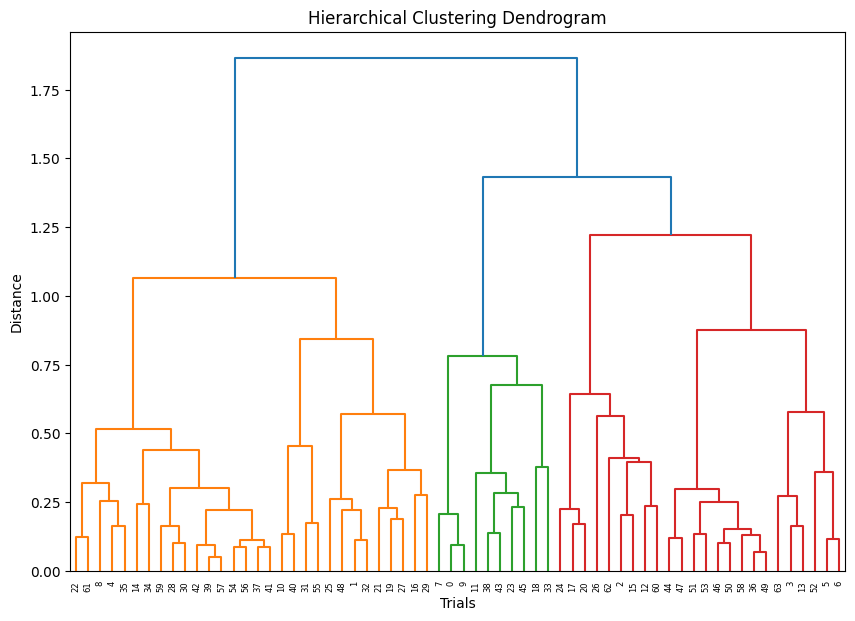

In [41]:
rel_trials = [trial for trial in experiment.trials if trial.weighted_val_perplexity is not None]

values = np.array([trial.weighted_val_perplexity for trial in rel_trials])
weights = np.array([list(trial.true_mixing_weights.values()) for trial in rel_trials])

# Create weight clusters
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Create a combined feature matrix by concatenating values and weights
feature_matrix = np.column_stack((weights, values))
feature_matrix = weights

# Perform hierarchical clustering using the 'ward' method
linked = linkage(feature_matrix, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Trials')
plt.ylabel('Distance')
plt.show()


In [42]:
# Determine clusters by cutting the dendrogram at a specific threshold
# Adjust the threshold based on your dendrogram plot
threshold = 0.2  # Example threshold
clusters = fcluster(linked, threshold, criterion='distance')

# clusters now contains the cluster labels for each trial
print(f"There are {len(set(clusters))} clusters")

There are 40 clusters


In [43]:
#assign trials to clusters
clusters_dict = {}
for i, cluster in enumerate(clusters):
    if cluster not in clusters_dict:
        clusters_dict[cluster] = {
            "trials": []
        }
    clusters_dict[cluster]["trials"].append(rel_trials[i])


for cluster, cluster_dict in clusters_dict.items():
    perplexities = [trial.weighted_val_perplexity for trial in cluster_dict["trials"]]
    best_perplexity = min(perplexities)
    best_weights = list(cluster_dict["trials"][np.argmin(perplexities)].true_mixing_weights.values())
    mean_perplexity = np.mean(perplexities)
    std = np.std(perplexities)
    weights_std = np.std([list(trial.true_mixing_weights.values()) for trial in cluster_dict["trials"]], axis=0)
    print(f"Cluster {cluster} has {len(cluster_dict['trials'])} trials. Best perplexity: {best_perplexity}, mean perplexity: {mean_perplexity}, std: {std}, best weights: {best_weights}, weights std: {weights_std}")
    
    clusters_dict[cluster]["best_perplexity"] = best_perplexity
    clusters_dict[cluster]["best_weights"] = best_weights
    clusters_dict[cluster]["mean_perplexity"] = mean_perplexity
    clusters_dict[cluster]["std"] = std
    clusters_dict[cluster]["weights_std"] = weights_std

Cluster 18 has 2 trials. Best perplexity: 4.631394159793854, mean perplexity: 4.719033363461495, std: 0.08763920366764077, best weights: [0.022111069685927562, 0.09916100396502504, 0.24637854695574793, 0.5545401849982176, 0.07780919439508195], weights std: [0.01051812 0.02162414 0.0158945  0.0141735  0.03386326]
Cluster 11 has 2 trials. Best perplexity: 4.439283108711243, mean perplexity: 4.45394437611103, std: 0.014661267399787459, best weights: [0.145435446386293, 0.18514839629675994, 0.196744153136923, 0.025303296667410508, 0.44736870751261354], weights std: [0.0239092  0.04556041 0.00834258 0.01265165 0.01734214]
Cluster 28 has 1 trials. Best perplexity: 4.570376259088516, mean perplexity: 4.570376259088516, std: 0.0, best weights: [0.17060313883650238, 0.09876422259777227, 0.47187320559188595, 0.04663624166918394, 0.21212319130465546], weights std: [0. 0. 0. 0. 0.]
Cluster 37 has 2 trials. Best perplexity: 4.508045932650566, mean perplexity: 4.552741956710816, std: 0.0446960240602

In [44]:
# reorder clusters dict by best perplexity
clusters_dict = {k: v for k, v in sorted(clusters_dict.items(), key=lambda item: item[1]["best_perplexity"])}

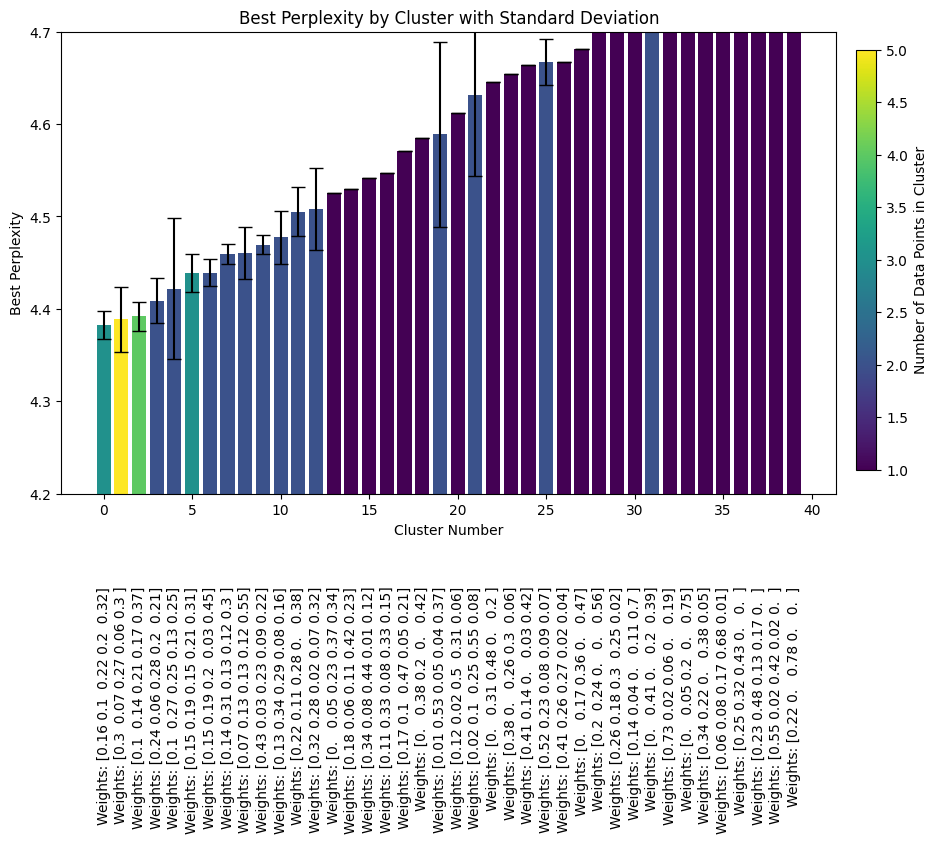

In [45]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming clusters_dict is already defined
# Extract the relevant information from the clusters_dict
best_perplexities = [cluster["best_perplexity"] for cluster in clusters_dict.values()]
std_devs = [cluster["std"] for cluster in clusters_dict.values()]
mixing_weights = [cluster["best_weights"] for cluster in clusters_dict.values()]
num_data_points = [len(cluster["trials"]) for cluster in clusters_dict.values()]

# Normalize the number of data points for coloring
norm = plt.Normalize(vmin=min(num_data_points), vmax=max(num_data_points))
cmap = plt.cm.viridis

# Create the figure and the axes, reserving space for the color bar
fig, ax = plt.subplots(figsize=(10, 6))
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # [left, bottom, width, height] for colorbar

# Create a bar plot with error bars and color based on the number of data points
bars = ax.bar(
    range(len(best_perplexities)), 
    best_perplexities, 
    yerr=std_devs, 
    capsize=5, 
    color=cmap(norm(num_data_points))
)

ax.set_xlabel('Cluster Number')
ax.set_ylabel('Best Perplexity')
ax.set_title('Best Perplexity by Cluster with Standard Deviation')
ax.set_ylim(4.2, 4.7)

# Add mixing weights as rotated labels below each bar
for bar, weights in zip(bars, mixing_weights):
    ax.text(bar.get_x() + bar.get_width() / 2.0, bar.get_y() + 4.1, 
            f"Weights: {np.round(weights, 2)}", ha='center', va='top', rotation=90)

# Add the color bar to the explicit axis
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Only for the colorbar; no need to pass actual data
cbar = plt.colorbar(sm, cax=cbar_ax)
cbar.set_label('Number of Data Points in Cluster')

plt.show()


[0.12156863 0.46666667 0.70588235 1.        ]


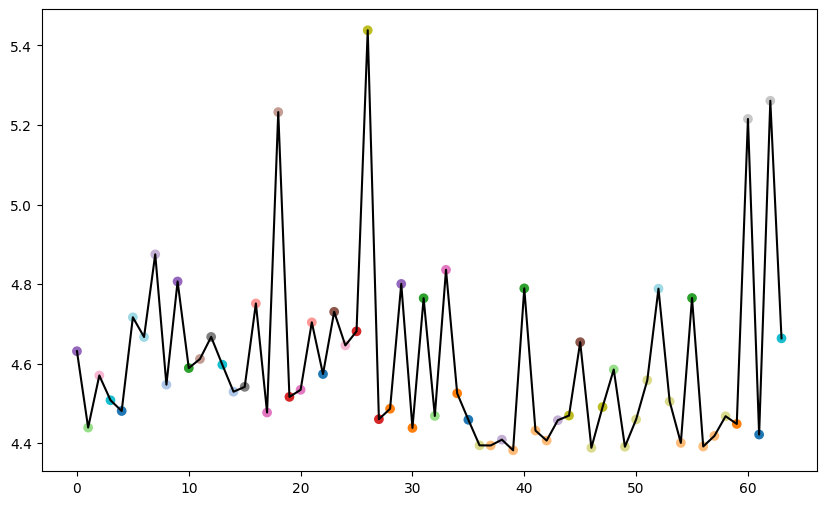

In [46]:
# plot perplexity over trials, color by cluster
import matplotlib
no_clusters = len(clusters_dict)
cluster_colors = matplotlib.colormaps.get_cmap('tab20')(np.linspace(0, 1, no_clusters))
print(cluster_colors[0])


values = []
for cluster, cluster_dict in clusters_dict.items():
    cluster_color = cluster_colors[cluster-1]
    local_array = []
    for trial in cluster_dict["trials"]:
        local_array.append((trial.weighted_val_perplexity, cluster_color, trial.idx))
    values.extend(local_array)

values = sorted(values, key=lambda x: x[2])

plt.figure(figsize=(10, 6))
y_values = [x[0] for x in values]
colors = [x[1] for x in values]
plt.plot(y_values, color='black')
plt.scatter(range(len(y_values)), y_values, c=colors)


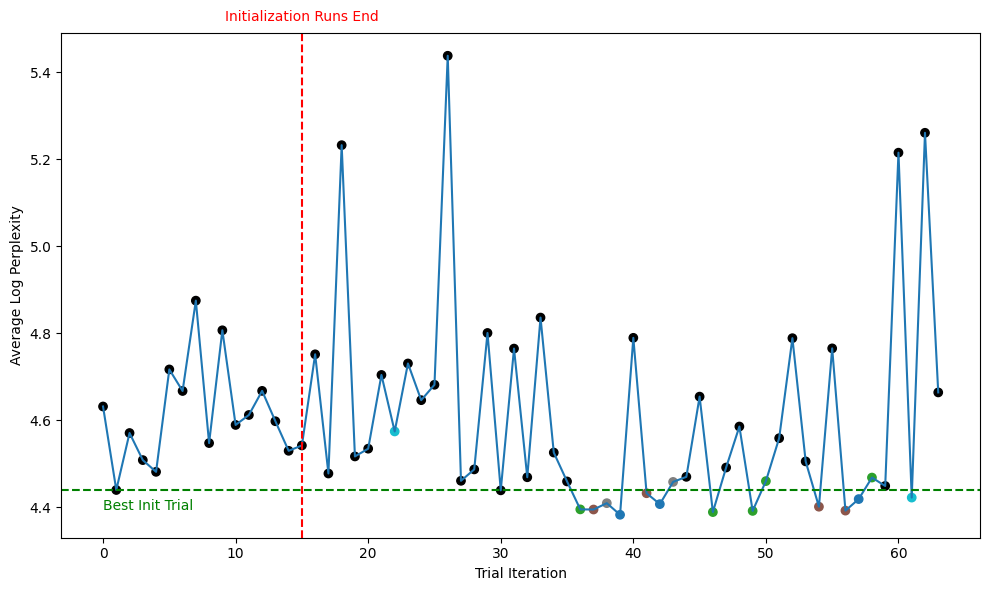

In [49]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

# Generate colors for the clusters
no_clusters = len(clusters_dict)
no_clusters_to_color = 5
cluster_colors = plt.get_cmap('tab10')(np.linspace(0, 1, no_clusters_to_color))
black_color = 'black'

# Prepare data for plotting
values = []
best_clusters = []
best_colors = []
for sort_idx, (cluster, cluster_dict) in enumerate(clusters_dict.items()):
    if sort_idx >= no_clusters_to_color:
        cluster_color = black_color
    else:
        cluster_color = cluster_colors[sort_idx]
        best_clusters.append(cluster)
        best_colors.append(cluster_color)
    local_array = []
    for trial in cluster_dict["trials"]:
        local_array.append((trial.weighted_val_perplexity, cluster_color, trial.idx))
    values.extend(local_array)

values = sorted(values, key=lambda x: x[2])

# Plot the data
plt.figure(figsize=(10, 6))
y_values = [x[0] for x in values]
colors = [x[1] for x in values]
plt.plot(y_values)  # Removed the color argument to use the default color (blue)
plt.scatter(range(len(y_values)), y_values, c=colors)

# Create a custom legend for the first 5 clusters
legend_patches = []
for (clus, col) in zip(best_clusters, best_colors):
    cluster = clusters_dict[clus]
    weights = np.round(cluster["best_weights"], 3)
    weights_std = np.round(cluster["weights_std"], 3)
    weight_str = ", ".join([f"{w}+-{w_std}" for w, w_std in zip(weights, weights_std)])
    
    colors = col
    patch = mpatches.Patch(color=colors, label=f'Cluster {clus}: [{weight_str}]')
    legend_patches.append(patch)

#plt.legend(handles=legend_patches, loc='lower center', bbox_to_anchor=(0.5, -0.4), ncol=1)
plt.xlabel('Trial Iteration')
plt.ylabel('Average Log Perplexity')

# Add vertical line at 15
no_initial_runs = 16
plt.axvline(x=no_initial_runs - 1, color='r', linestyle='--')
plt.annotate('Initialization Runs End', 
                 xy=(no_initial_runs - 1, max(y_values)), 
                 xytext=(no_initial_runs - 1, max(y_values) + 0.08),  
                 textcoords='data', 
                 ha='center',  
                 color='r')

best_init_trial = min(y_values[:no_initial_runs])
plt.axhline(y=best_init_trial, color='g', linestyle='--')
plt.text(0, best_init_trial - 0.02, "Best Init Trial", 
         verticalalignment='top',  
         color='g')

# Show the plot
plt.tight_layout()
plt.show()
